In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
sns.set() 


In [2]:
data = pd.read_excel("Data_Train.xlsx")


In [3]:
#printing the first 5 entries of the dataset 
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#gives the info about all the colummns present in the dataset with the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#droping all the NAN values and also printing out the NAN walues present in each column
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

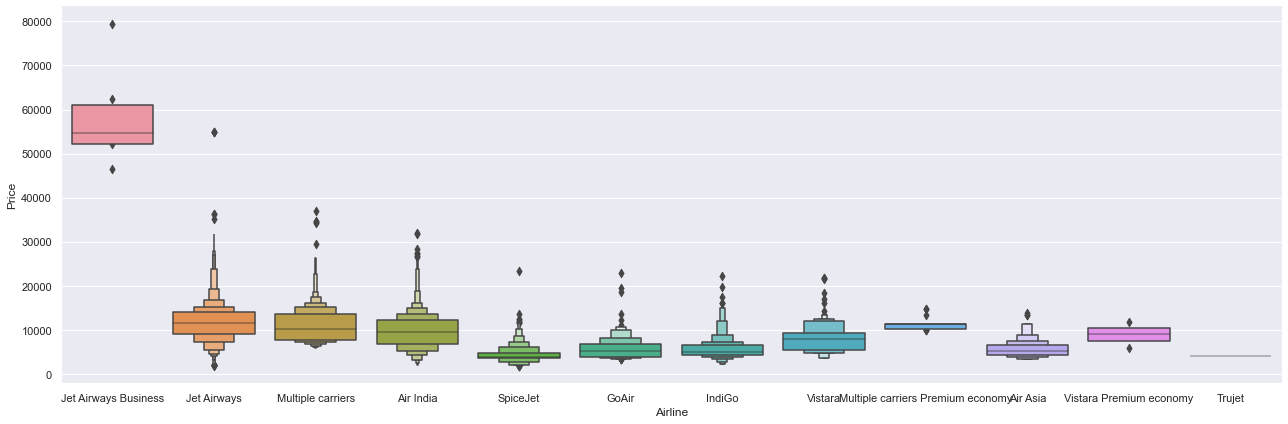

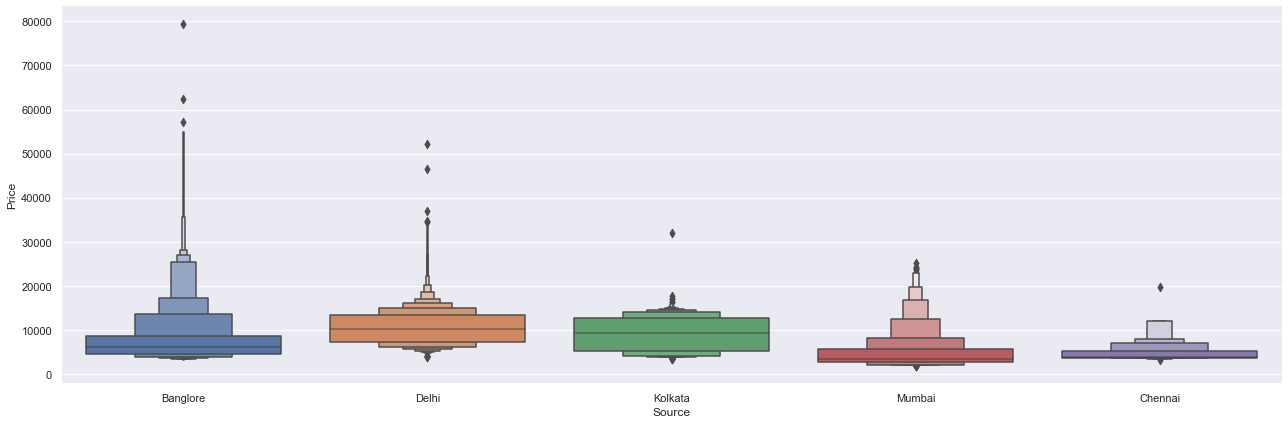

In [6]:
#data visualization
#for Airlines

sns.catplot(x = 'Airline',y='Price',data=data.sort_values("Price",ascending=False),kind="boxen", height = 6, aspect = 3 )
plt.show()
#here the only airlines have higher price while rest all have more or less the same fairs
sns.catplot(x = 'Source',y='Price',data=data.sort_values("Price",ascending=False),kind="boxen", height = 6, aspect = 3 )
#here the only bangalore and delhi  have higher price while rest all have more or less the same fairs
#we can go with one hot encoding with both of the columns

In [7]:


duration_hr = []
duration_min = []
    
#to seperate the hours and minutes from the column dep_time
data['dep_hr']=pd.to_datetime(data['Dep_Time']).dt.hour
data['dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute
data.drop(['Dep_Time'],axis=1,inplace=True)
    
    
#t seperate the day and moth from the column Date_of_Journey
data['travel_day'] = pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day
data['travel_month'] = pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month
data.drop(['Date_of_Journey'],axis=1,inplace=True)
    
    
#to seperate the hour and minute from the Arrival_Time column
data['arrival_hr'] = pd.to_datetime(data['Arrival_Time'],).dt.hour
data['arrival_min'] = pd.to_datetime(data['Arrival_Time'],).dt.minute
data.drop(['Arrival_Time'],axis=1,inplace=True)
    
    
#to separate the hours and minutes from the Duration column
duration = list(data['Duration'])
for i in range(len(duration)):
    if(len(duration[i].split())!= 2):
        if("h" in duration[i]):
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i].strip() 

    duration_hr.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))
data['Duration_hours'] = duration_hr
data['Duration_minutes'] = duration_min
data.drop(['Duration'],axis=1,inplace=True)
    
#the airlines data are one hot encoded because the order doesn't matter or ranking of the airlines doesnt matter so we can use onehot encoded data to the model
airlines = data[['Airline']]
airlines = pd.get_dummies(airlines,drop_first=True)
    
#the source data are one hot encoded because the order doesn't matter or ranking of the source doesnt matter so we can use onehot encoded data to the mode
source = data[['Source']]
source = pd.get_dummies(source,drop_first=True)
    
#performing onehotencoding on destination
destination = data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
    
#label encoding on the Total_Stops
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)
    
data = pd.concat([data,airlines,source,destination],axis=1)

data.drop(["Route","Airline","Source","Destination","Route","Additional_Info"],axis=1,inplace=True)

In [8]:
tdata = pd.read_excel(r"Test_set.xlsx")


duration_hour = []
duration_minute = []
    
#to seperate the hours and minutes from the column dep_time
tdata['dep_hr']=pd.to_datetime(tdata['Dep_Time']).dt.hour
tdata['dep_min']=pd.to_datetime(tdata['Dep_Time']).dt.minute
tdata.drop(['Dep_Time'],axis=1,inplace=True)
    
    
#t seperate the day and moth from the column Date_of_Journey
tdata['travel_day'] = pd.to_datetime(tdata['Date_of_Journey'],format="%d/%m/%Y").dt.day
tdata['travel_month'] = pd.to_datetime(tdata['Date_of_Journey'],format="%d/%m/%Y").dt.month
tdata.drop(['Date_of_Journey'],axis=1,inplace=True)
    
    
#to seperate the hour and minute from the Arrival_Time column
tdata['arrival_hr'] = pd.to_datetime(tdata['Arrival_Time'],).dt.hour
tdata['arrival_min'] = pd.to_datetime(tdata['Arrival_Time'],).dt.minute
tdata.drop(['Arrival_Time'],axis=1,inplace=True)
    
    
#to separate the hours and minutes from the Duration column
duration = list(tdata['Duration'])
for i in range(len(duration)):
    if(len(duration[i].split())!= 2):
        if("h" in duration[i]):
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i].strip() 

    duration_hour.append(int(duration[i].split(sep="h")[0]))
    duration_minute.append(int(duration[i].split(sep="m")[0].split()[-1]))

tdata['Duration_hours'] = duration_hour
tdata['Duration_minutes'] = duration_minute
tdata.drop(['Duration'],axis=1,inplace=True)
    
#the airlines data are one hot encoded because the order doesn't matter or ranking of the airlines doesnt matter so we can use onehot encoded data to the model
airlines = tdata[['Airline']]
airlines = pd.get_dummies(airlines,drop_first=True)
    
#the source data are one hot encoded because the order doesn't matter or ranking of the source doesnt matter so we can use onehot encoded data to the mode
source = tdata[['Source']]
source = pd.get_dummies(source,drop_first=True)
    
#performing onehotencoding on destination
destination = tdata[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
    
#label encoding on the Total_Stops
tdata.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)
    
tdata = pd.concat([tdata,airlines,source,destination],axis=1)

tdata.drop(["Route","Airline","Source","Destination","Route","Additional_Info"],axis=1,inplace=True)

tdata.head()

,Total_Stops,dep_hr,dep_min,travel_day,travel_month,arrival_hr,arrival_min,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,17,30,6,6,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,6,20,12,5,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,19,15,21,5,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,8,0,21,5,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,23,55,24,6,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
#seperating the independent feature 
X = data.loc[:,['Total_Stops', 'dep_hr', 'dep_min', 'travel_day',
       'travel_month', 'arrival_hr', 'arrival_min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,dep_hr,dep_min,travel_day,travel_month,arrival_hr,arrival_min,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,22,20,24,3,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,50,1,5,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,25,9,6,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,18,5,12,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,16,50,1,3,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#seperating the dependent feature 
y = data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [11]:
#for selecting the important features 
features_selector = ExtraTreesRegressor()
features_selector.fit(X,y)


ExtraTreesRegressor()

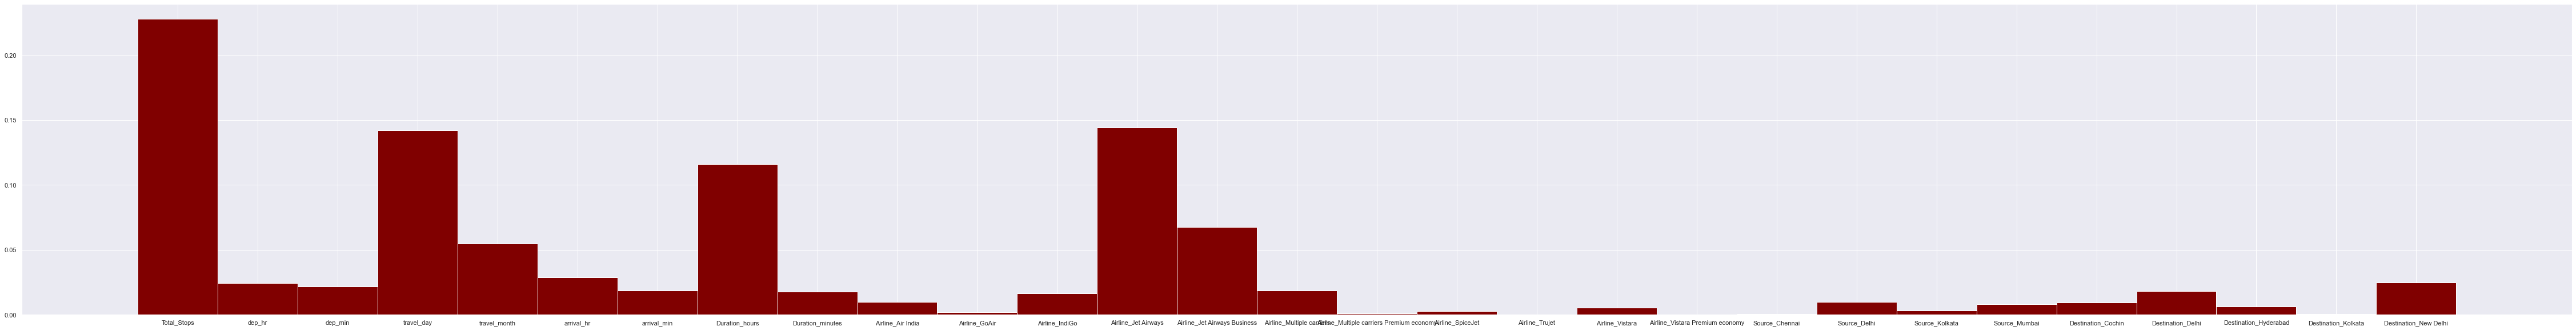

In [12]:
fig = plt.figure(figsize =(80,10))
plt.bar(features_selector.feature_names_in_,features_selector.feature_importances_ ,color ='maroon',width = 1,)
plt.show()

In [13]:
X_train , X_test , y_train , y_test = tts(X,y,test_size=0.2,random_state=42)

In [14]:
model_1= RandomForestRegressor()
model_1.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
#prediction on X_test
pred = model_1.predict(X_test)




In [16]:
#score of training set 
model_1.score(X_train,y_train)

0.9545061758268928

In [17]:
#score of test set
model_1.score(X_test,y_test)

0.7987117576395637